In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/swiggy-restaurants-dataset/swiggy_file.csv


In [2]:
df = pd.read_csv("/kaggle/input/swiggy-restaurants-dataset/swiggy_file.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140657 entries, 0 to 140656
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Restaurant Name    140657 non-null  object
 1   Cuisine            140630 non-null  object
 2   Rating             140657 non-null  object
 3   Number of Ratings  126115 non-null  object
 4   Average Price      140657 non-null  object
 5   Number of Offers   140657 non-null  int64 
 6   Offer Name         138849 non-null  object
 7   Area               140655 non-null  object
 8   Pure Veg           140657 non-null  object
 9   Location           140657 non-null  object
dtypes: int64(1), object(9)
memory usage: 10.7+ MB


In [4]:
df.isnull().sum()

Restaurant Name          0
Cuisine                 27
Rating                   0
Number of Ratings    14542
Average Price            0
Number of Offers         0
Offer Name            1808
Area                     2
Pure Veg                 0
Location                 0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.isnull().sum()

Restaurant Name      0
Cuisine              0
Rating               0
Number of Ratings    0
Average Price        0
Number of Offers     0
Offer Name           0
Area                 0
Pure Veg             0
Location             0
dtype: int64

In [7]:
df.describe(include="all")

,Restaurant Name,Cuisine,Rating,Number of Ratings,Average Price,Number of Offers,Offer Name,Area,Pure Veg,Location
count,124597,124597,124597,124597,124597,124597.000000,124597,124597,124597,124597
unique,89531,2023,42,17,474,NaN,18571,15291,2,580
top,Domino'S Pizza,"North Indian, Chinese",--,100+ ratings,₹200 for two,NaN,FLAT ₹120 OFF\nUSE AXIS120ABOVE ₹500,Civil Lines,No,Kanpur
freq,211,5971,18848,23094,35260,NaN,30508,1636,71372,2115
mean,NaN,NaN,NaN,NaN,NaN,3.248642,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,1.550697,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


In [8]:
df.head()

,Restaurant Name,Cuisine,Rating,Number of Ratings,Average Price,Number of Offers,Offer Name,Area,Pure Veg,Location
0,La Pino'Z Pizza,"Pizzas, Pastas",4.0,10+ ratings,₹250 for two,2,FLAT DEAL\nFLAT ₹125 OFF\nUSE FLAT125ABOVE ₹69...,LALA LAJPAT RAI MARKET,No,Abohar
1,The Second Wife,"Indian, North Indian",3.6,50+ ratings,₹250 for two,2,"30% OFF UPTO ₹75\nUSE TRYNEWABOVE ₹149, FLAT ₹...",Central Abohar,No,Abohar
2,Tasty Bites,"Italian, Beverages",3.8,10+ ratings,₹200 for two,1,FLAT ₹120 OFF\nUSE AXIS120ABOVE ₹500,Central Abohar,Yes,Abohar
3,Food Studio,"Pizzas, Burgers",3.5,8 ratings,₹49 for two,5,"50% OFF UPTO ₹100\nUSE TRYNEWABOVE ₹129, FLAT ...",Central Abohar,Yes,Abohar
4,Roll Express,"Fast Food, Snacks",4.3,100+ ratings,₹200 for two,2,DEAL OF DAY\n10% OFF UPTO ₹40\nUSE STEALDEALAB...,Circular Road,No,Abohar


In [9]:
df.columns= [i.replace(" ","_") for i in df.columns]

In [10]:
plt.style.use("ggplot")

<Axes: title={'center': 'Top 10 locations by number of restaurants'}>

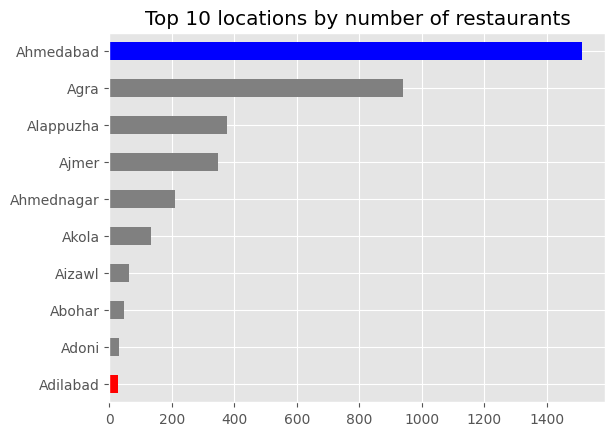

In [11]:
df.groupby("Location")['Restaurant_Name'].size().iloc[:10].sort_values().plot.barh(ylabel="",title="Top 10 locations by number of restaurants", color=['red']+['grey']*8+['blue'])

In [12]:
df.Rating.value_counts(dropna=False)

Rating
--     18848
4.3    13246
4.2    12619
4.1    10599
4.4     8869
4.0     8618
3.8     6655
3.9     6575
4.5     5826
3.7     4344
4.6     3817
3.5     3307
3.6     3138
4.7     2154
5.0     2102
3.4     2080
3.3     2071
4.8     1539
3.2     1474
3.0     1122
3.1     1047
4.9      704
2.8      682
2.9      680
2.7      524
2.5      388
2.6      364
2.4      275
2.0      239
2.3      234
2.2      157
2.1      120
1.5       55
1.9       32
1.8       29
1.7       28
1.6       20
1.4        6
1.3        5
1.0        3
1.1        1
1.2        1
Name: count, dtype: int64

In [13]:
df.Rating = pd.to_numeric(df.Rating,errors='coerce')

In [14]:
df.Rating.value_counts(dropna=False)

Rating
NaN    18848
4.3    13246
4.2    12619
4.1    10599
4.4     8869
4.0     8618
3.8     6655
3.9     6575
4.5     5826
3.7     4344
4.6     3817
3.5     3307
3.6     3138
4.7     2154
5.0     2102
3.4     2080
3.3     2071
4.8     1539
3.2     1474
3.0     1122
3.1     1047
4.9      704
2.8      682
2.9      680
2.7      524
2.5      388
2.6      364
2.4      275
2.0      239
2.3      234
2.2      157
2.1      120
1.5       55
1.9       32
1.8       29
1.7       28
1.6       20
1.4        6
1.3        5
1.0        3
1.1        1
1.2        1
Name: count, dtype: int64

<Axes: title={'center': 'Average Rating per Location'}>

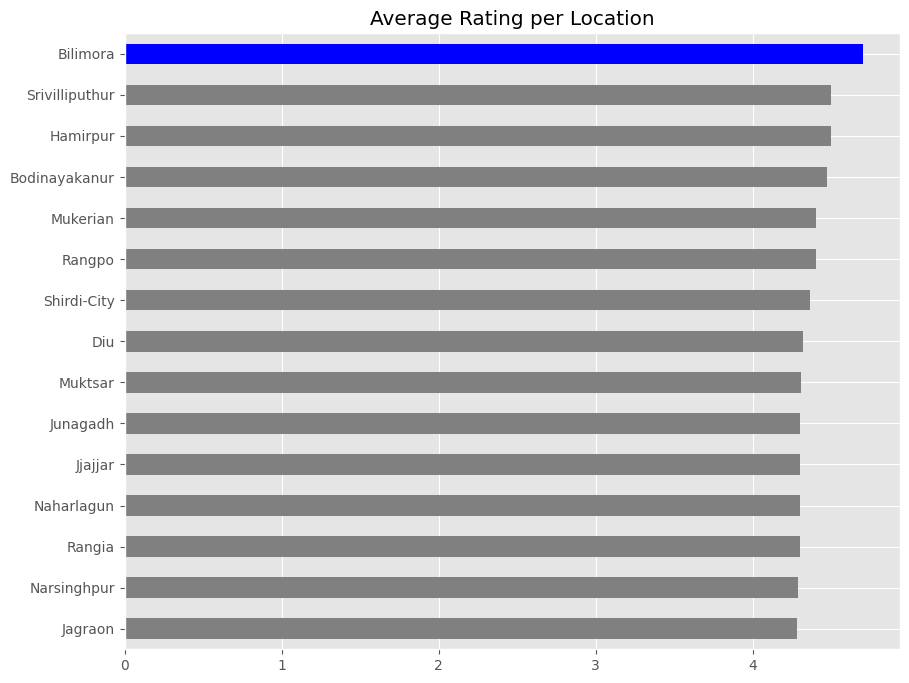

In [15]:
df.groupby("Location")["Rating"].mean().sort_values(ascending=False).iloc[:15].sort_values().plot.barh(ylabel="", title="Average Rating per Location", figsize=(10,8),color=['grey']*14+['blue'])

<Axes: title={'center': 'Frequency of Cuisines'}>

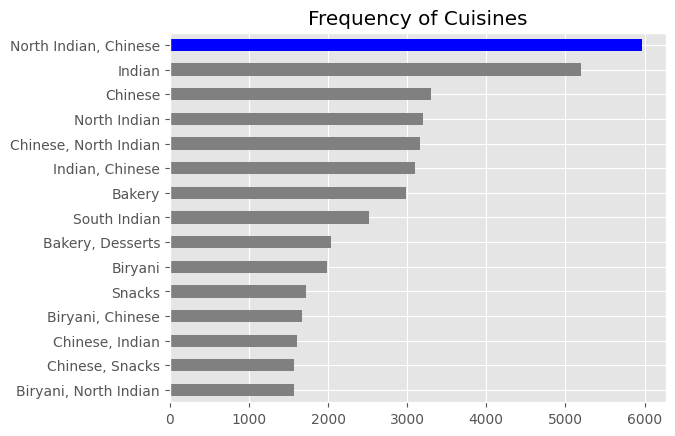

In [16]:
df.Cuisine.value_counts().iloc[:15].sort_values().plot.barh(title='Frequency of Cuisines',ylabel="",color=['grey']*14+['blue'])

In [17]:
df.Average_Price.str.count('two').unique()

array([1])

In [18]:
df.Average_Price = df.Average_Price.apply(lambda a: a.split()[0][1:])

In [19]:
(df.Average_Price==0).sum()

0

In [20]:
df.Average_Price = df.Average_Price.astype("float64")

In [21]:
df.columns

Index(['Restaurant_Name', 'Cuisine', 'Rating', 'Number_of_Ratings',
       'Average_Price', 'Number_of_Offers', 'Offer_Name', 'Area', 'Pure_Veg',
       'Location'],
      dtype='object')

<Axes: title={'center': 'Proportion of Pure Vegetable restaurants'}>

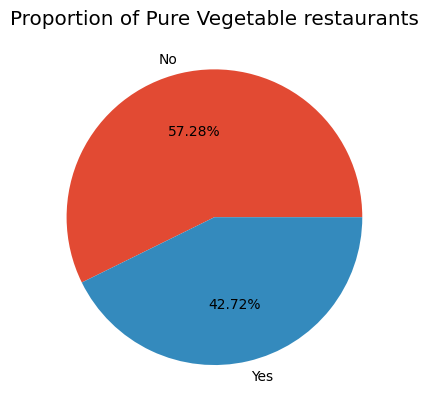

In [22]:
df.Pure_Veg.value_counts().plot.pie(ylabel="",title='Proportion of Pure Vegetable restaurants', autopct="%.2f%%")

<Axes: title={'center': 'Non-Pure Veg restaurants have a higher average price'}>

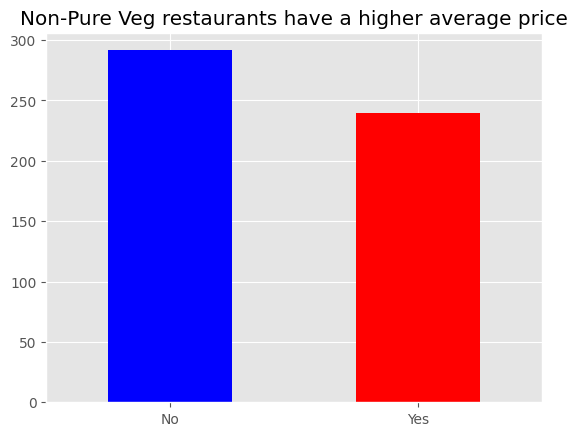

In [23]:
df.groupby("Pure_Veg")['Average_Price'].mean().plot.bar(ylabel="",rot=360,color=['blue','red'],title="Non-Pure Veg restaurants have a higher average price", xlabel="")

In [24]:
from scipy.stats import ttest_ind
no = df.loc[df.Pure_Veg=='No','Average_Price']
yes = df.loc[df.Pure_Veg=='Yes','Average_Price']
tstat, pval = ttest_ind(no,yes)
if pval<0.05:
    print("The difference in price between Pure veg and non-pure veg restaurants is not by chance.")
else:
    print("The difference in price between Pure veg and non-pure veg restaurants is by chance.")


The difference in price between Pure veg and non-pure veg restaurants is not by chance.


<Axes: title={'center': 'Average Offer per Restaurant Type'}>

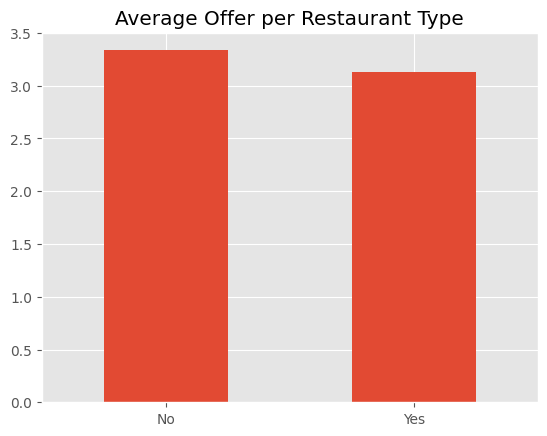

In [25]:
df.groupby('Pure_Veg')['Number_of_Offers'].mean().plot.bar(xlabel="",title="Average Offer per Restaurant Type", rot=360)

#### Non-Pure Veg Restaurants are more popular and profitable.

In [26]:
no = df.loc[df.Pure_Veg=='No','Number_of_Offers']
yes = df.loc[df.Pure_Veg=='Yes','Number_of_Offers']
tstat, pval = ttest_ind(no,yes)
if pval<0.05:
    print("The difference in offers between Pure veg and non-pure veg restaurants is not by chance.")
else:
    print("The difference in offers between Pure veg and non-pure veg restaurants is by chance.")


The difference in offers between Pure veg and non-pure veg restaurants is not by chance.


In [27]:
df.columns

Index(['Restaurant_Name', 'Cuisine', 'Rating', 'Number_of_Ratings',
       'Average_Price', 'Number_of_Offers', 'Offer_Name', 'Area', 'Pure_Veg',
       'Location'],
      dtype='object')

In [28]:
df.Number_of_Ratings.value_counts()

Number_of_Ratings
100+ ratings       23094
Too Few Ratings    18848
20+ ratings        15446
1K+ ratings        13390
10+ ratings        11308
50+ ratings        10893
500+ ratings        8356
3 ratings           3904
4 ratings           3084
5K+ ratings         3021
5 ratings           2753
6 ratings           2372
10K+ ratings        2213
7 ratings           2144
8 ratings           1829
9 ratings           1699
2 ratings            243
Name: count, dtype: int64

In [29]:
number_of_ratings = df.Number_of_Ratings

In [30]:
number_of_ratings = number_of_ratings.apply(lambda a: a.split()[0].strip('+')).replace('Too',np.nan)

In [31]:
number_of_ratings.dtype

dtype('O')

In [32]:
number_of_ratings.iloc[16]

nan

In [33]:
number_of_ratings = number_of_ratings.replace(np.nan,'0')

In [34]:
number_of_ratings = number_of_ratings.apply(lambda a: a.strip().replace("K",'000'))


In [35]:
number_of_ratings.value_counts()

Number_of_Ratings
100      23094
0        18848
20       15446
1000     13390
10       11308
50       10893
500       8356
3         3904
4         3084
5000      3021
5         2753
6         2372
10000     2213
7         2144
8         1829
9         1699
2          243
Name: count, dtype: int64

In [36]:
number_of_ratings = number_of_ratings.astype('float64').sort_values(ascending=False)

In [37]:
number_of_ratings.dtype

dtype('float64')

In [38]:
number_of_ratings.sort_values(ascending=False)

138902    10000.0
32389     10000.0
138552    10000.0
23041     10000.0
74411     10000.0
           ...   
25407         0.0
134958        0.0
25366         0.0
25365         0.0
140656        0.0
Name: Number_of_Ratings, Length: 124597, dtype: float64

In [39]:
number_of_ratings = pd.to_numeric(number_of_ratings,errors='coerce')
bins = [2,100,600,20000]
df['Rating_Category'] = pd.cut(number_of_ratings,bins=bins,labels=['small','medium','large'])

In [40]:
df.Rating_Category.value_counts()

Rating_Category
small     78526
large     18624
medium     8356
Name: count, dtype: int64

In [41]:
df.groupby(['Location','Rating_Category'])['Rating_Category'].size()

/tmp/ipykernel_33/3925486519.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Location','Rating_Category'])['Rating_Category'].size()


Location      Rating_Category
Abohar        small              26
              medium              6
              large               5
Adilabad      small              20
              medium              1
                                 ..
Yamuna-Nagar  medium             14
              large              19
Yavatmal      small              53
              medium             11
              large               5
Name: Rating_Category, Length: 1740, dtype: int64

In [42]:
ratings = df.groupby(['Location','Rating_Category'])['Rating_Category'].count().unstack().idxmax(axis=1)

/tmp/ipykernel_33/3003304950.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ratings = df.groupby(['Location','Rating_Category'])['Rating_Category'].count().unstack().idxmax(axis=1)


In [43]:
ratings.sort_values(ascending=False)

Location
Kayamkulam    large
Abohar        small
Narnaul       small
Namakkal      small
Nanded        small
              ...  
Gokak         small
Golaghat      small
Gonda         small
Gondia        small
Yavatmal      small
Length: 580, dtype: category
Categories (3, object): ['small' < 'medium' < 'large']